Pavel Uchamprin - Project Final

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [3]:
df = pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Checking for NAN values.

In [4]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
df.isna().sum()/len(df)*100

country                0.000000
year                   0.000000
sex                    0.000000
age                    0.000000
suicides_no            0.000000
population             0.000000
suicides/100k pop      0.000000
country-year           0.000000
HDI for year          69.935298
 gdp_for_year ($)      0.000000
gdp_per_capita ($)     0.000000
generation             0.000000
dtype: float64

In [6]:
#Dropping NA values in HDI for year.
df.dropna(how='any', inplace=True)

In [7]:
df.isna().sum()/len(df)*100

country               0.0
year                  0.0
sex                   0.0
age                   0.0
suicides_no           0.0
population            0.0
suicides/100k pop     0.0
country-year          0.0
HDI for year          0.0
 gdp_for_year ($)     0.0
gdp_per_capita ($)    0.0
generation            0.0
dtype: float64

In [8]:
#I created histograms for each column in order to see where the majority of the data located for each graph

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'suicides_no'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'suicides/100k pop'}>],
       [<AxesSubplot:title={'center':'HDI for year'}>,
        <AxesSubplot:title={'center':'gdp_per_capita ($)'}>]],
      dtype=object)

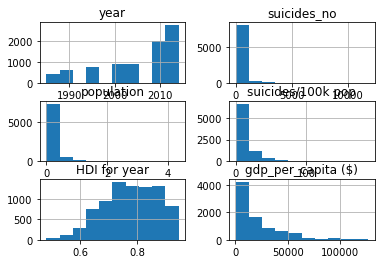

In [9]:
df.hist()

In [10]:
#I decided to check the skewness of each column. The normal skewness is from -0.5 to 0.5, so only two columns are normal
#other columns need to be normalized

In [11]:
df.skew() 

year                 -0.936065
suicides_no           8.480958
population            4.728765
suicides/100k pop     2.904729
HDI for year         -0.300877
gdp_per_capita ($)    1.764734
dtype: float64

In [12]:
#Checking the type of each column in order to avoid working with categorical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8364 entries, 72 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             8364 non-null   object 
 1   year                8364 non-null   int64  
 2   sex                 8364 non-null   object 
 3   age                 8364 non-null   object 
 4   suicides_no         8364 non-null   int64  
 5   population          8364 non-null   int64  
 6   suicides/100k pop   8364 non-null   float64
 7   country-year        8364 non-null   object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   8364 non-null   object 
 10  gdp_per_capita ($)  8364 non-null   int64  
 11  generation          8364 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 849.5+ KB


In [13]:
#I only took numerical variables to normalize them. It does not make sense to work categorical columns such as 
# country	year	sex	age	 and generation
d = df.iloc[:, [4,5,6,8,9]]

In [14]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8364 entries, 72 to 27819
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   suicides_no         8364 non-null   int64  
 1   population          8364 non-null   int64  
 2   suicides/100k pop   8364 non-null   float64
 3   HDI for year        8364 non-null   float64
 4    gdp_for_year ($)   8364 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 392.1+ KB


In [15]:
d.dtypes

suicides_no             int64
population              int64
suicides/100k pop     float64
HDI for year          float64
 gdp_for_year ($)      object
dtype: object

In [16]:
#Replacing the coma in gdp for year column to get an integer instead of object

In [17]:
d[" gdp_for_year ($) "] = d[" gdp_for_year ($) "].apply(lambda x : int(x.replace(",","")))

<ipython-input-17-487a2a11b1c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d[" gdp_for_year ($) "] = d[" gdp_for_year ($) "].apply(lambda x : int(x.replace(",","")))


In [18]:
d

,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($)
72,13,232900,5.58,0.619,2424499009
73,9,178000,5.06,0.619,2424499009
74,2,40800,4.90,0.619,2424499009
75,13,283500,4.59,0.619,2424499009
76,11,241200,4.56,0.619,2424499009
...,...,...,...,...,...
27815,107,3620833,2.96,0.675,63067077179
27816,9,348465,2.58,0.675,63067077179
27817,60,2762158,2.17,0.675,63067077179
27818,44,2631600,1.67,0.675,63067077179


In [19]:
#Using standardscaler to normalize the skewness of the columns/
scaled = StandardScaler()
d1= scaled.fit_transform(d)

In [20]:
d1

array([[-0.28360444, -0.40792713, -0.36933551, -1.68808103, -0.31699902],
       [-0.28947847, -0.42175753, -0.39928816, -1.68808103, -0.31699902],
       [-0.29975802, -0.45632093, -0.40850436, -1.68808103, -0.31699902],
       ...,
       [-0.21458461,  0.2292432 , -0.56575577, -1.08825965, -0.28174178],
       [-0.23808073,  0.19635305, -0.59455639, -1.08825965, -0.28174178],
       [-0.27185639, -0.10410296, -0.60665266, -1.08825965, -0.28174178]])

In [21]:
#The skewness was normalized. Majority of columns fall under the -0.5 to 0.5 category
pd.DataFrame(data = d1, columns = d.columns)

,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($)
0,-0.283604,-0.407927,-0.369336,-1.688081,-0.316999
1,-0.289478,-0.421758,-0.399288,-1.688081,-0.316999
2,-0.299758,-0.456321,-0.408504,-1.688081,-0.316999
3,-0.283604,-0.395180,-0.426361,-1.688081,-0.316999
4,-0.286541,-0.405836,-0.428089,-1.688081,-0.316999
...,...,...,...,...,...
8359,-0.145565,0.445560,-0.520251,-1.088260,-0.281742
8360,-0.289478,-0.378814,-0.542139,-1.088260,-0.281742
8361,-0.214585,0.229243,-0.565756,-1.088260,-0.281742
8362,-0.238081,0.196353,-0.594556,-1.088260,-0.281742


In [22]:
#Predicting suicide number by using independent variables such as population and annual gross domestic profit. 

In [23]:
X = d[["population"," gdp_for_year ($) "]]
y = d[["suicides_no"]]

In [24]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [25]:
# Training
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) 

LinearRegression()

In [26]:
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])


number of test samples : 1673
number of training samples: 6691


In [27]:
# Prediction
prediction = lin_reg.predict(X_test)
prediction

array([[12.86378826],
       [70.41948849],
       [41.81522601],
       ...,
       [35.93723597],
       [-7.11121136],
       [74.11017567]])

Methods of Evaluation

In [28]:
# using R**2 to evaluate training and testing data

In [29]:
print(f"score: {lin_reg.score(X_train,y_train)}")

score: 0.48970870431878455


In [30]:
print(f"score: {lin_reg.score(X_test,y_test)}")


score: 0.5563738440032272


In [32]:
#Using Cross Validation

In [33]:
Rcross = cross_val_score(lin_reg, X_train, y_train, cv=4)
Rcross

array([0.48228456, 0.48417927, 0.41853994, 0.51210733])

In [34]:
Rcross = cross_val_score(lin_reg, X_test, y_test, cv=4)
Rcross

array([0.13834098, 0.63949331, 0.57831847, 0.57802979])

In [35]:
#Using RMSE 

In [36]:
print("RMSE:",np.sqrt(mean_squared_error(y_test, prediction)))

RMSE: 452.11803298866374


In [42]:
d["suicides_no"].mean()

206.1243424198948

In [37]:
#Using Mean Absolute Error

In [38]:
print("MAE :", mean_absolute_error(y_test,prediction))

MAE : 163.11502470075382
